In [1]:
import rioxarray

In [2]:
api_url = "https://earth-search.aws.element84.com/v1"

In [3]:
from pystac_client import Client

In [4]:
client = Client.open(api_url)

In [5]:
collection = "sentinel-2-l2a" # Sentinel 2 Level 2

In [6]:
from shapely.geometry import Point

In [7]:
point = Point(4.89, 52.37) # Amsterdam coords

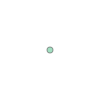

In [8]:
point

In [9]:
search = client.search(
    collections=[collection],
    intersects=point,
    max_items=10
)

In [10]:
print(search.matched())

1436


In [11]:
items = search.item_collection()

In [12]:
print(len(items))

10


In [13]:
for item in items:
    print(item)

<Item id=S2B_31UFU_20250310_0_L2A>
<Item id=S2B_31UFU_20250307_0_L2A>
<Item id=S2C_31UFU_20250305_0_L2A>
<Item id=S2C_31UFU_20250302_0_L2A>
<Item id=S2B_31UFU_20250228_0_L2A>
<Item id=S2B_31UFU_20250225_0_L2A>
<Item id=S2C_31UFU_20250223_0_L2A>
<Item id=S2C_31UFU_20250220_0_L2A>
<Item id=S2B_31UFU_20250218_0_L2A>
<Item id=S2B_31UFU_20250215_0_L2A>


In [14]:
item = items[0]
print(item.datetime)
print(item.geometry)
print(item.properties)

2025-03-10 10:56:25.445000+00:00
{'type': 'Polygon', 'coordinates': [[[4.49847509340006, 53.240199174677954], [4.464995307918372, 52.25346561204129], [6.071664488869857, 52.22257539160585], [6.141754296879469, 53.20819279121764], [4.49847509340006, 53.240199174677954]]]}
{'created': '2025-03-10T14:53:37.519Z', 'platform': 'sentinel-2b', 'constellation': 'sentinel-2', 'instruments': ['msi'], 'eo:cloud_cover': 16.706888, 'proj:code': 'EPSG:32631', 'proj:centroid': {'lat': 52.73296, 'lon': 5.29426}, 'mgrs:utm_zone': 31, 'mgrs:latitude_band': 'U', 'mgrs:grid_square': 'FU', 'grid:code': 'MGRS-31UFU', 'view:azimuth': 234.8436187848016, 'view:incidence_angle': 3.5758996641936167, 'view:sun_azimuth': 164.438521291391, 'view:sun_elevation': 32.27445998805, 's2:tile_id': 'S2B_OPER_MSI_L2A_TL_2BPS_20250310T132140_A041833_T31UFU_N05.11', 's2:degraded_msi_data_percentage': 0.0025, 's2:nodata_pixel_percentage': 0, 's2:saturated_defective_pixel_percentage': 0, 's2:cloud_shadow_percentage': 0.045302, 

In [15]:
assets = items[0].assets #first item asset dictionary
print(assets.keys())

dict_keys(['aot', 'blue', 'cloud', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'product_metadata', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'snow', 'swir16', 'swir22', 'tileinfo_metadata', 'visual', 'wvp', 'thumbnail', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])


In [16]:
for key, asset in assets.items():
    print(f"{key}: {asset.title}")

aot: Aerosol optical thickness (AOT)
blue: Blue - 10m
cloud: Cloud Probabilities
coastal: Coastal - 60m
granule_metadata: None
green: Green - 10m
nir: NIR 1 - 10m
nir08: NIR 2 - 20m
nir09: NIR 3 - 60m
product_metadata: None
red: Red - 10m
rededge1: Red Edge 1 - 20m
rededge2: Red Edge 2 - 20m
rededge3: Red Edge 3 - 20m
scl: Scene classification map (SCL)
snow: Snow Probabilities
swir16: SWIR 1.6μm - 20m
swir22: SWIR 2.2μm - 20m
tileinfo_metadata: None
visual: True color image
wvp: Water Vapour (WVP)
thumbnail: Thumbnail of preview image
aot-jp2: Aerosol optical thickness (AOT)
blue-jp2: Blue - 10m
coastal-jp2: Coastal - 60m
green-jp2: Green - 10m
nir-jp2: NIR 1 - 10m
nir08-jp2: NIR 2 - 20m
nir09-jp2: NIR 3 - 60m
red-jp2: Red - 10m
rededge1-jp2: Red Edge 1 - 20m
rededge2-jp2: Red Edge 2 - 20m
rededge3-jp2: Red Edge 3 - 20m
scl-jp2: Scene classification map (SCL)
swir16-jp2: SWIR 1.6μm - 20m
swir22-jp2: SWIR 2.2μm - 20m
visual-jp2: True color image
wvp-jp2: Water Vapour (WVP)


In [17]:
print(assets["thumbnail"].href)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2025/3/S2B_31UFU_20250310_0_L2A/preview.jpg


In [18]:
print(assets["nir"])

<Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2025/3/S2B_31UFU_20250310_0_L2A/B08.tif>


In [19]:
import rioxarray
nir_href= assets["nir"].href
nir = rioxarray.open_rasterio(nir_href)
print(nir)

<xarray.DataArray (band: 1, y: 10980, x: 10980)> Size: 241MB
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 88kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 88kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    OVR_RESAMPLING_ALG:  AVERAGE
    AREA_OR_POINT:       Area
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


In [20]:
nir.rio.to_raster("nir.tif")

In [21]:
nir

<xarray.DataArray (band: 1, y: 10980, x: 10980)> Size: 241MB
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 88kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 88kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    OVR_RESAMPLING_ALG:  AVERAGE
    AREA_OR_POINT:       Area
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0